
Read and understand the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Print the head of the database
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300

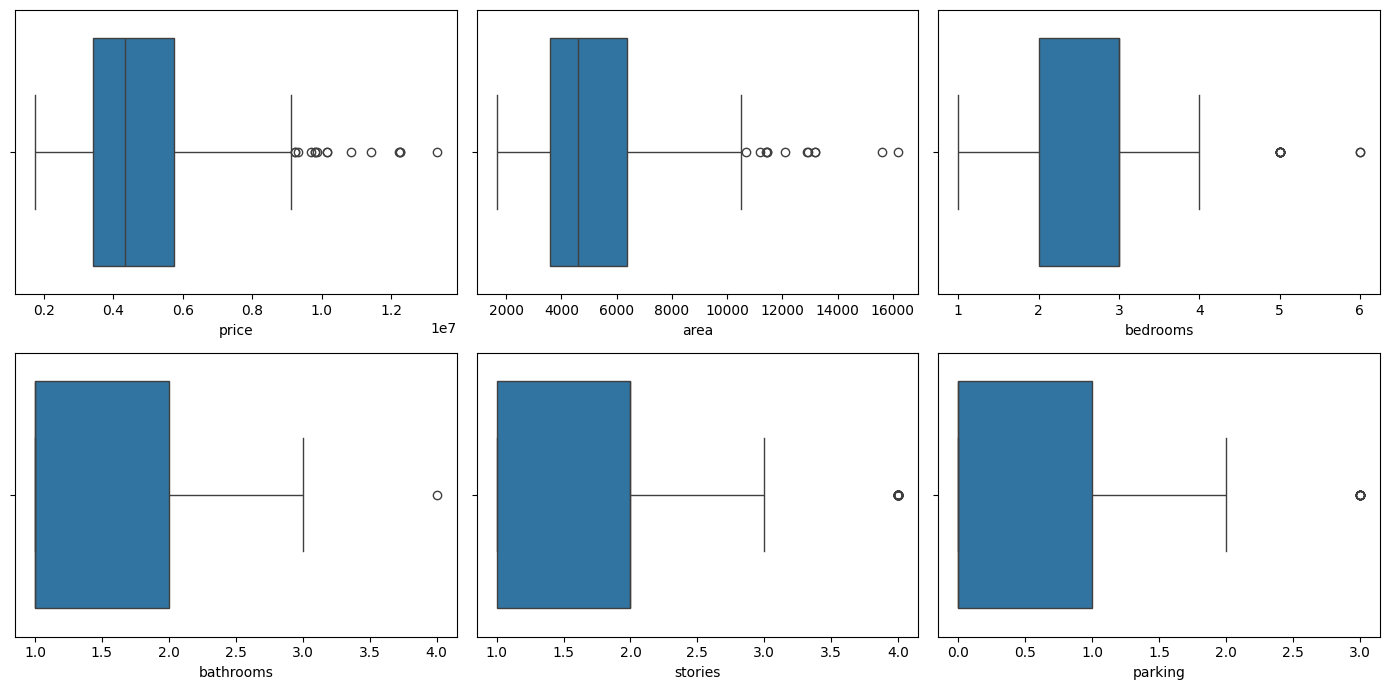


Outlier treatment for price, area

Box plot of price, area, bedroom, bathroom, stories, parking (filtered data)


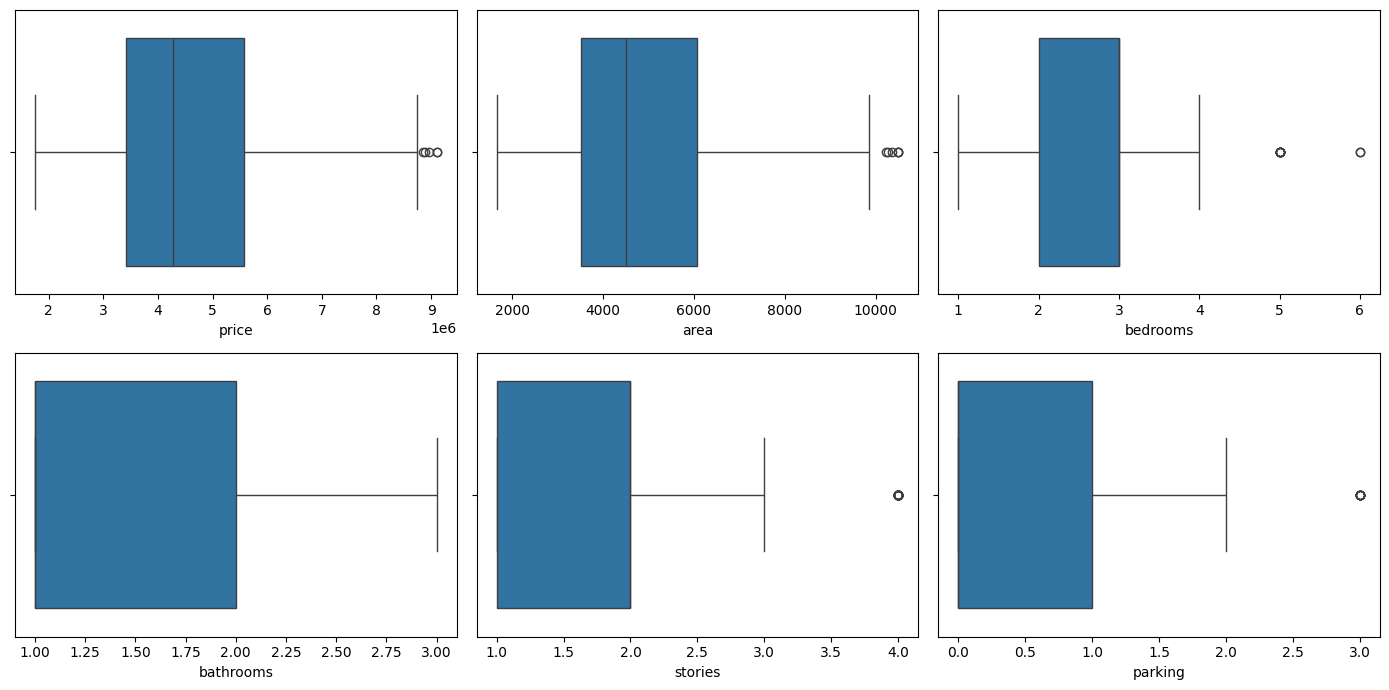


Pair plot for original data


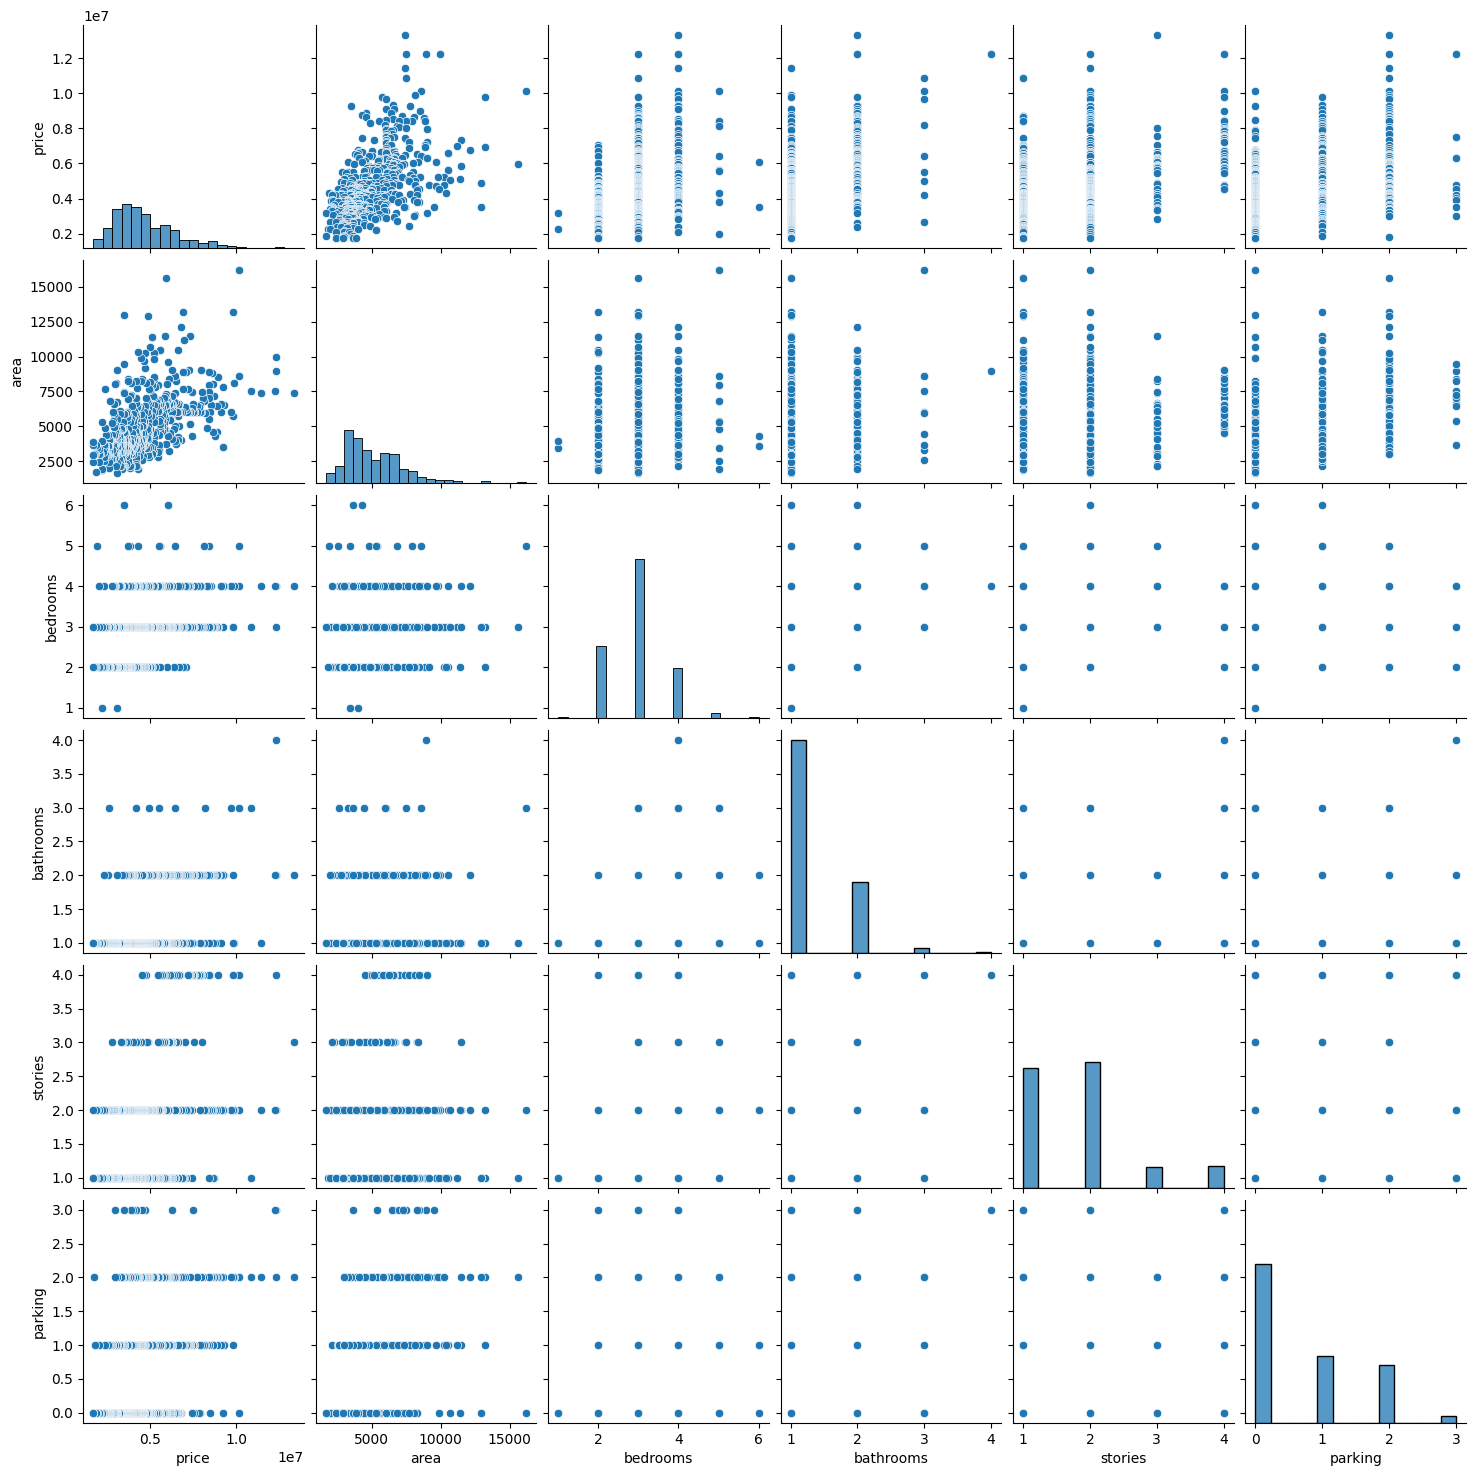


Pair plot for filtered data


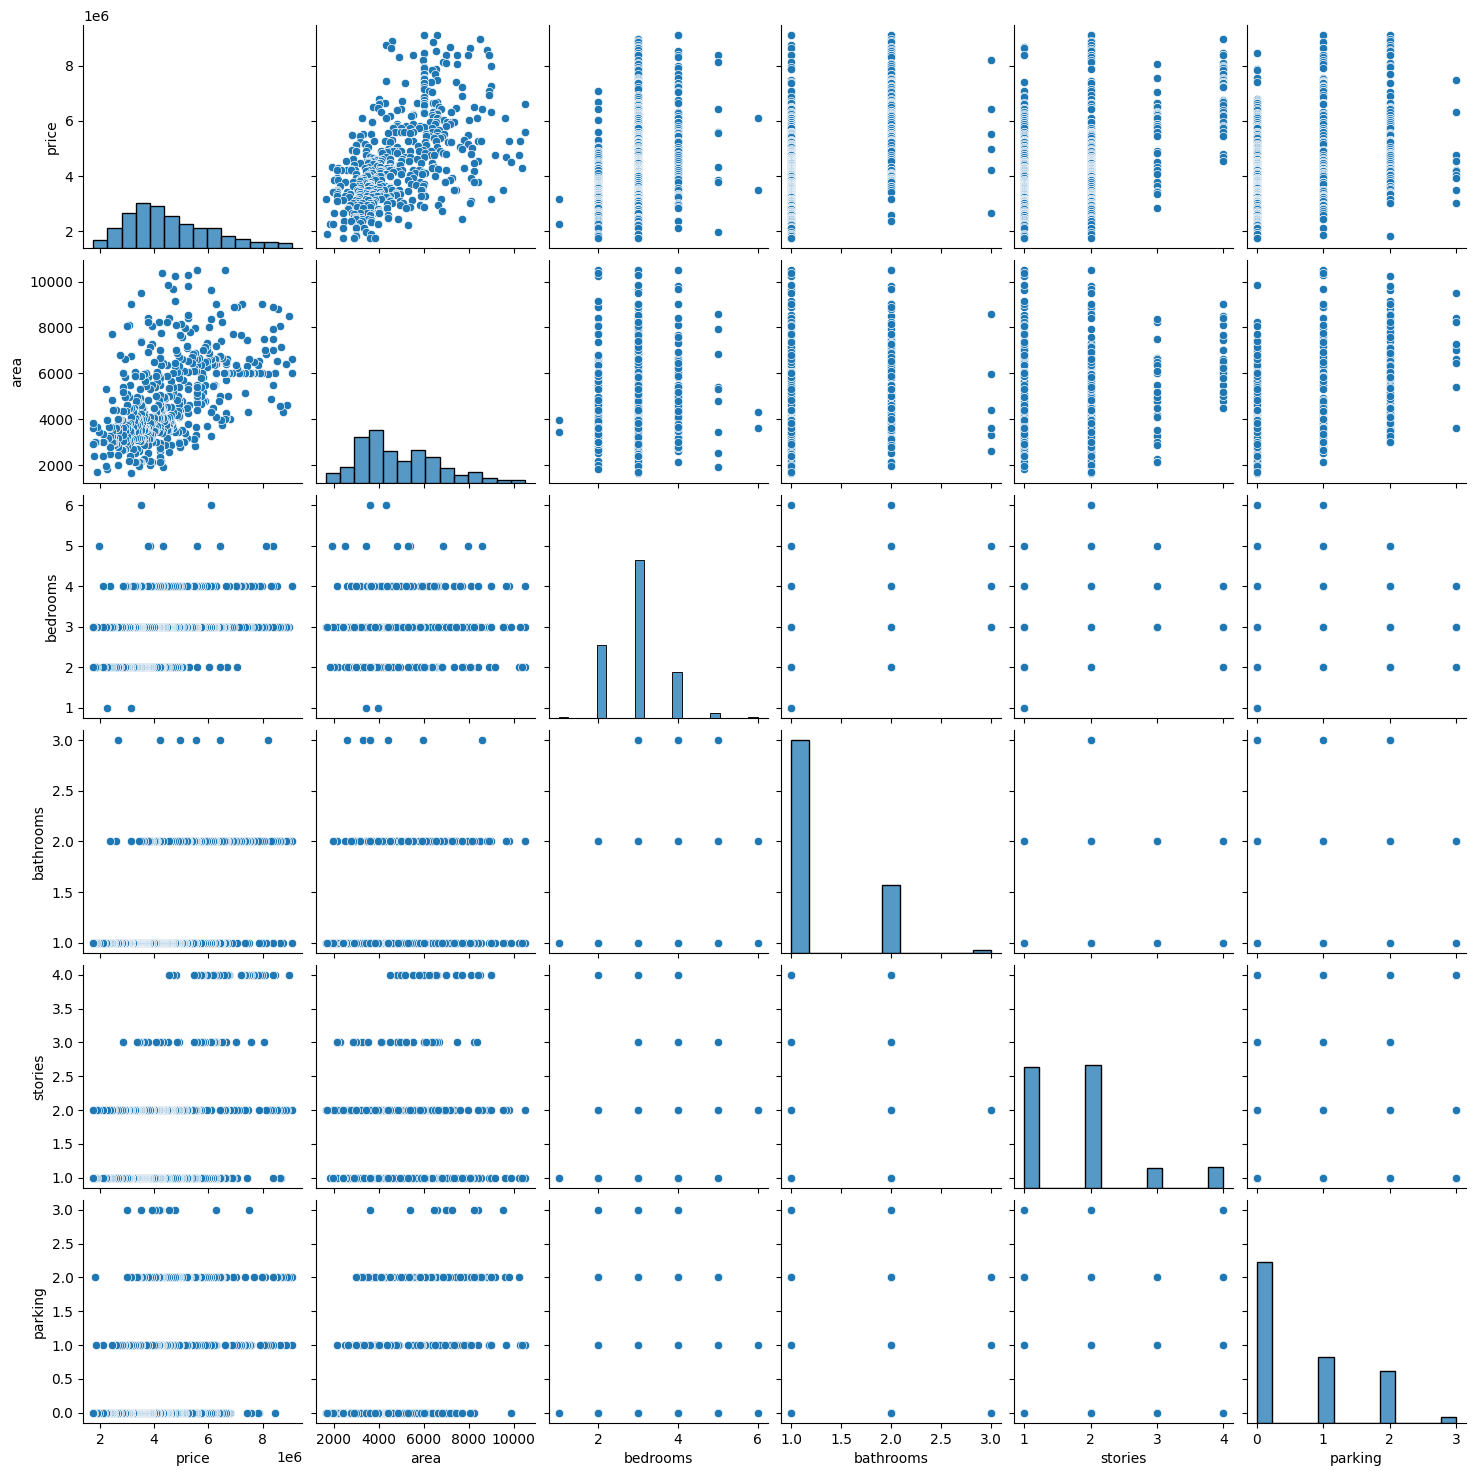

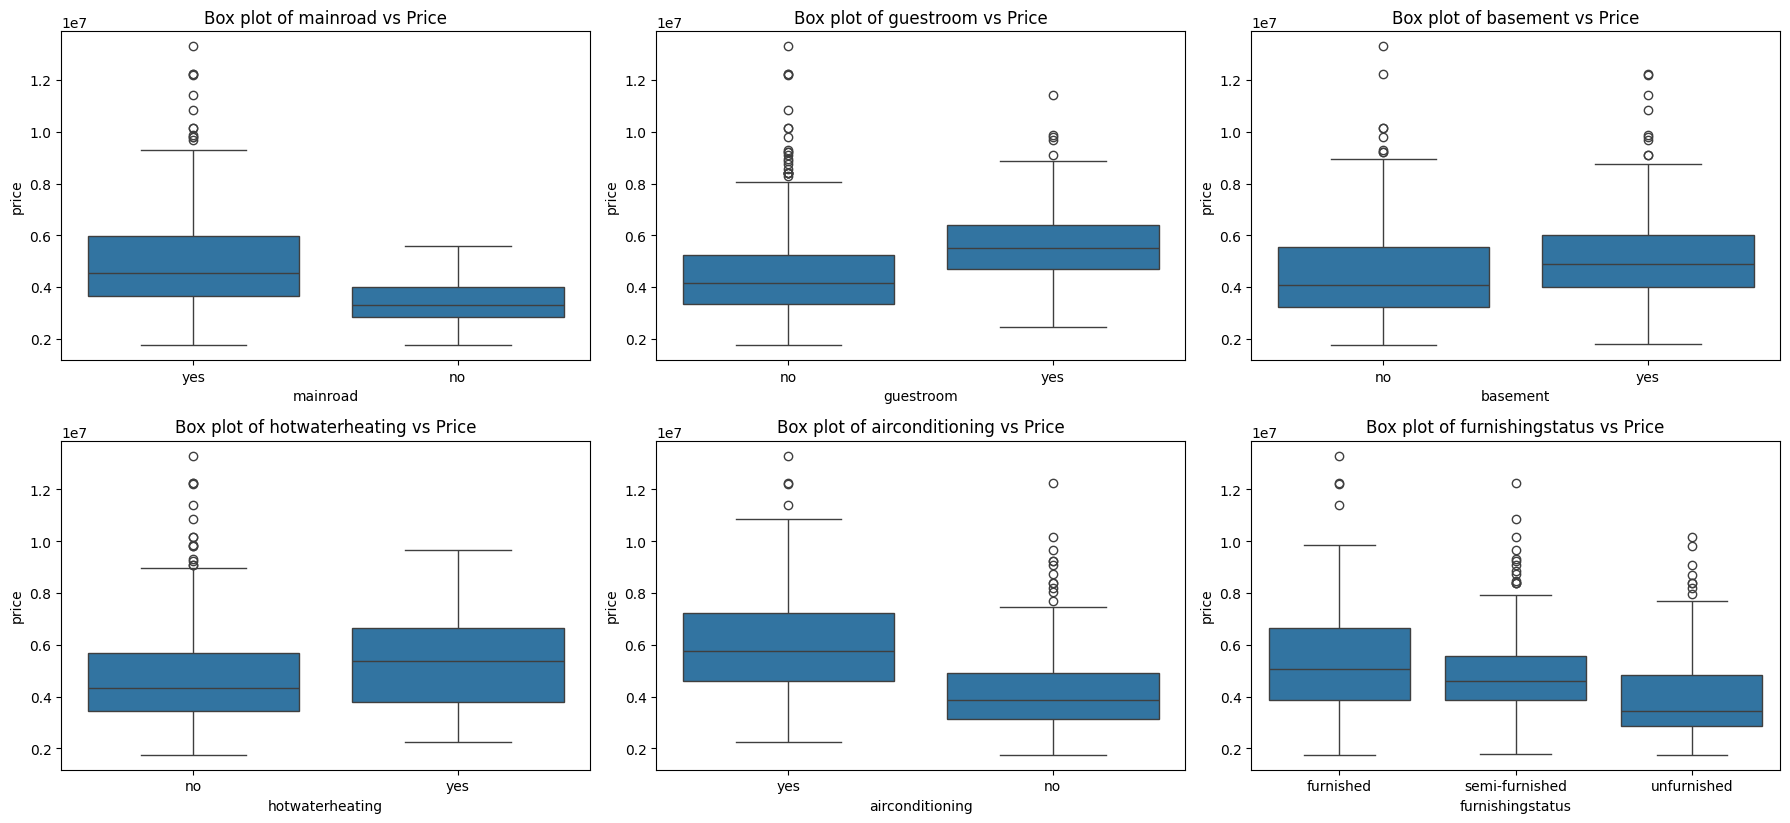

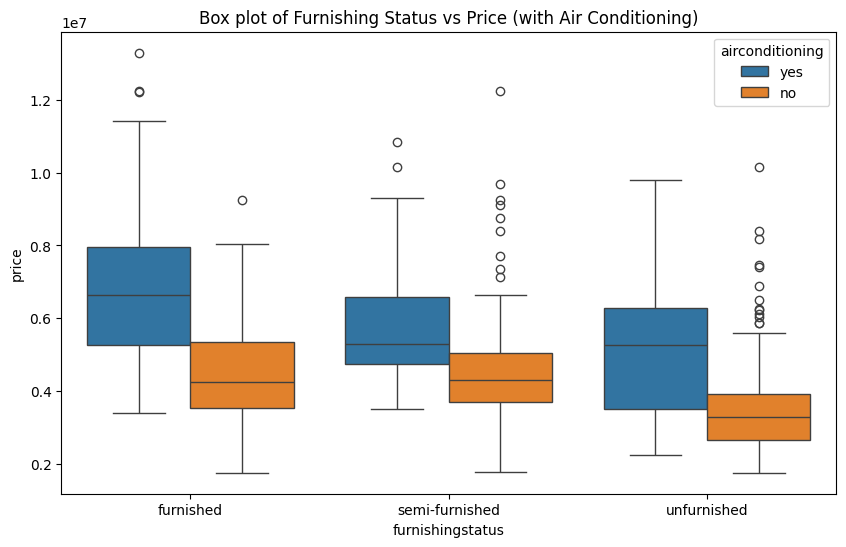


Mapping binary variables

First few rows after mapping:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking prefarea  \
0         0                0                1        2      yes   
1         0                0                1        3       no   
2         1                0                0        2      yes   
3         1                0                1        3      yes   
4         1                0                1        2       no   

   furnishingstatus  
0               NaN  
1               NaN  
2               NaN  
3               NaN

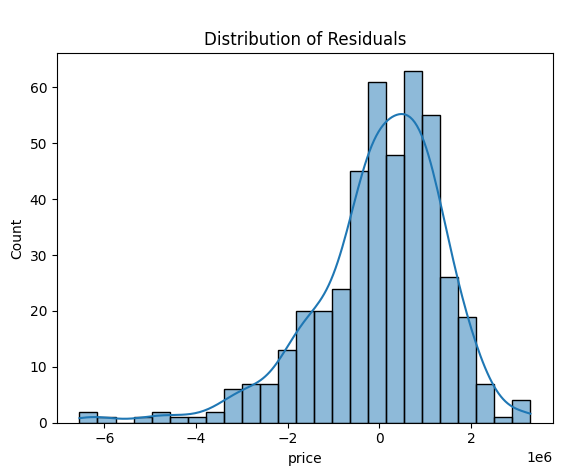


Scatter plot of predicted vs actual values


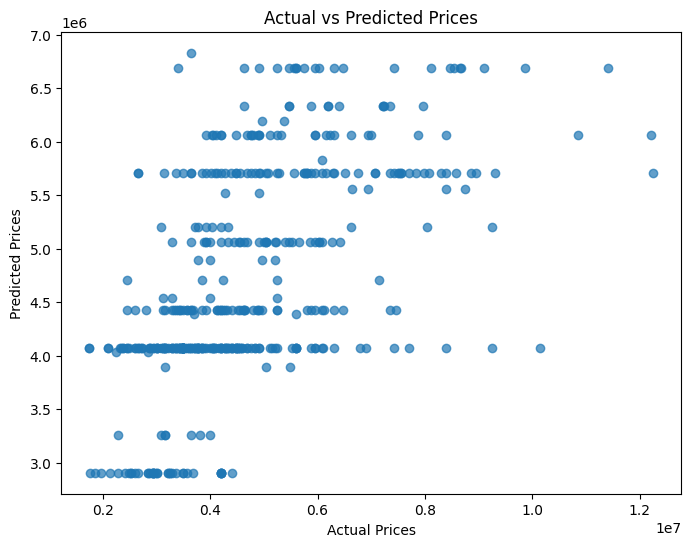


Visualization of predicted vs actual prices (Test Set)


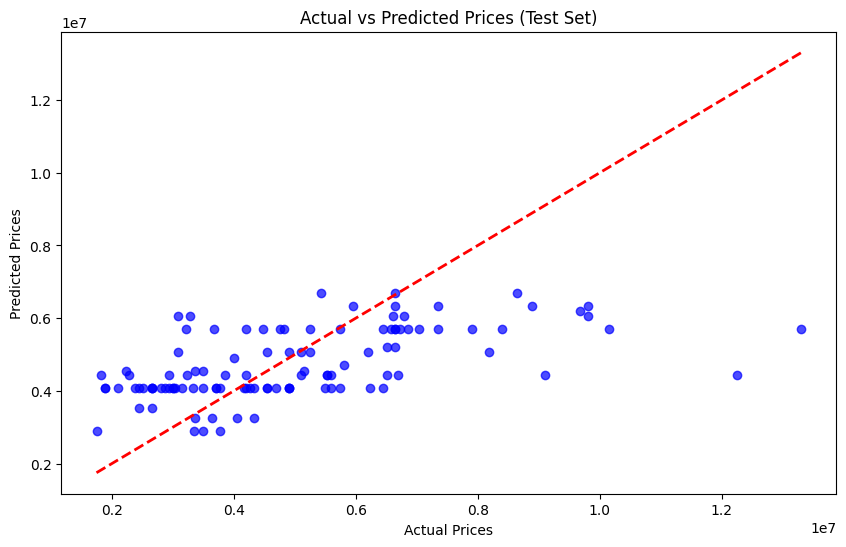

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error, r2_score

#s1
file_path = '/content/drive/MyDrive/Infobyte/Task1 House Price Prediction/Housing.csv'
df = pd.read_csv(file_path)

#s2
print("\nRead and understand the data")
print(df.info())
print("\nPrint the head of the database")
print(df.head())
print("\nInspect the dataset")
print(df.describe())
print("\nData cleaning")
print("\nChecking for missing values:")
print(df.isnull().sum())

#s3
print("\nBox plot of price, area, bedroom, bathroom, stories, parking")
plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
sns.boxplot(x='price', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='area', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='bedrooms', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='bathrooms', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='stories', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='parking', data=df)
plt.tight_layout()
plt.show()

#s4
print("\nOutlier treatment for price, area")
# Calculate IQR
Q1 = df[['price', 'area']].quantile(0.25)
Q3 = df[['price', 'area']].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df[['price', 'area']] < (Q1 - 1.5 * IQR)) | (df[['price', 'area']] > (Q3 + 1.5 * IQR))).any(axis=1)]

#s5
print("\nBox plot of price, area, bedroom, bathroom, stories, parking (filtered data)")
plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
sns.boxplot(x='price', data=df_filtered)
plt.subplot(2, 3, 2)
sns.boxplot(x='area', data=df_filtered)
plt.subplot(2, 3, 3)
sns.boxplot(x='bedrooms', data=df_filtered)
plt.subplot(2, 3, 4)
sns.boxplot(x='bathrooms', data=df_filtered)
plt.subplot(2, 3, 5)
sns.boxplot(x='stories', data=df_filtered)
plt.subplot(2, 3, 6)
sns.boxplot(x='parking', data=df_filtered)
plt.tight_layout()
plt.show()

#s6
print("\nPair plot for original data")
sns.pairplot(df)
plt.show()
print("\nPair plot for filtered data")
sns.pairplot(df_filtered)
plt.show()

#s7
variables_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

plt.figure(figsize=(18, 12))
for i, var in enumerate(variables_to_map, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=var, y='price', data=df)
    plt.title(f'Box plot of {var} vs Price')
plt.tight_layout()
plt.show()

#s8
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=df)
plt.title('Box plot of Furnishing Status vs Price (with Air Conditioning)')
plt.show()

#s9
print("\nMapping binary variables")
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

for var in variables_to_map:
    df[var] = binary_map(df[var])

print("\nFirst few rows after mapping:")
print(df.head())

#s10
print("\nGetting dummies for furnishingstatus")
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
print("\nDummies for furnishingstatus:")
print(status.head())

#s11
print("\nDropping furnishingstatus")
df = pd.concat([df, status], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)
print("\nFirst few rows after dropping furnishingstatus:")
print(df.head())

#s12
print("\nEnsuring consistent train-test split")
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#s13
print("\nScaling numerical variables")
scaler = MinMaxScaler()
numerical_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
print("\nFirst few rows after scaling:")
print(X_train.head())

#s14
print("\nDescriptive statistics of scaled data")
print(X_train.describe())

#s15
print("\nFeature selection and model building")
variables_to_map.remove('furnishingstatus')
encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[variables_to_map])

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train_encoded, y_train)
selected_features = X_train[variables_to_map].columns[rfe.support_]
print("Selected features:")
print(selected_features)

#s16
print("\nCalculating VIF")

X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(variables_to_map))

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_encoded_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_encoded_df.values, i) for i in range(X_train_encoded_df.shape[1])]

print(vif_data)

#s17
print("\nDistribution plot of residuals")
residuals = fit.predict(X_train_encoded) - y_train
sns.histplot(residuals, kde=True)
plt.title("\nDistribution of Residuals")
plt.show()

#s18
print("\nScatter plot of predicted vs actual values")
plt.figure(figsize=(8, 6))
plt.scatter(y_train, fit.predict(X_train_encoded), alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

#s19
print("\nVisualization of predicted vs actual prices (Test Set)")
y_pred_test = fit.predict(encoder.transform(X_test[variables_to_map]))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')